# Hierarchical classification on Wikivitals

In [92]:
import numpy as np
from scipy import sparse
from sknetwork.data import load_netset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

## Data

In [93]:
dataset = load_netset('wikivitals')

Parsing files...
Done.


In [94]:
# links
adjacency = dataset.adjacency
# words
biadjacency = dataset.biadjacency

In [95]:
labels_hierarchy = dataset.labels_hierarchy
names_labels_hierarchy = dataset.names_labels_hierarchy

In [96]:
len(names_labels_hierarchy)

1968

In [98]:
def get_labels(labels_hierarchy, names_labels_hierarchy, depth=1, sep='|||'):
    names_depth = [sep.join(name.split(sep)[:depth]) for name in names_labels_hierarchy]
    names_depth_index = {name: i for i, name in enumerate(np.unique(names_depth))}
    index = np.array([names_depth_index[name] for name in names_depth])
    labels = index[labels_hierarchy]
    names_labels = np.array(list(names_depth_index))
    return np.array(labels), names_labels

In [100]:
def get_labels_v2(labels_hierarchy, names_labels_hierarchy, hierarchy=True, depth=1, sep='|||'):
    names_depth = [sep.join(name.split(sep)[:depth]) for name in names_labels_hierarchy]
    names_depth_index = {name: i for i, name in enumerate(np.unique(names_depth))}
    index = np.array([names_depth_index[name] for name in names_depth])
    labels = index[labels_hierarchy]
    names_labels = np.array(list(names_depth_index))
    levels = [np.array(list(names_depth_index.values()))]

    if hierarchy:
        for i in range(depth-1, 0, -1):
            names_depth_i = [sep.join(name.split(sep)[:i]) for name in names_labels_hierarchy]
            names_depth_index_i = {name: i for i, name in enumerate(np.unique(names_depth_i))}

            names_depth_i = [sep.join(name.split(sep)[:i]) for name in names_labels]
            level = np.array([names_depth_index_i[name] for name in names_depth_i])
            levels.append(level)

    return np.array(labels), names_labels, np.array(levels)
        

In [101]:
labels, names_labels, levels = get_labels_v2(labels_hierarchy, names_labels_hierarchy, hierarchy=False, depth=2)

In [102]:
names_labels

array(['Arts|||Architecture', 'Arts|||Cultural venues',
       'Arts|||Fictional characters', 'Arts|||General',
       'Arts|||Literature', 'Arts|||Modern visual arts', 'Arts|||Music',
       'Arts|||Performing arts', 'Arts|||Visual arts',
       'Biological and health sciences|||Anatomy and morphology',
       'Biological and health sciences|||Basics',
       'Biological and health sciences|||Biochemistry and molecular biology',
       'Biological and health sciences|||Biological processes and physiology',
       'Biological and health sciences|||Botany',
       'Biological and health sciences|||Cell biology',
       'Biological and health sciences|||Ecology',
       'Biological and health sciences|||Health, medicine and disease',
       'Biological and health sciences|||Organisms',
       'Biological and health sciences|||Zoology',
       'Everyday life|||Clothing and fashion',
       'Everyday life|||Cooking, food and drink',
       'Everyday life|||Family and kinship',
       'Ever

In [83]:
from torch import nn    
import torch 

In [104]:
import torch
import torch.nn as nn

# Assuming logits and targets are tensors with appropriate shapes
logits = torch.tensor([[0.5, 1.2, -0.1], [1.0, 0.2, 0.8]])
targets = torch.tensor([1, 0])

# Create an instance of CrossEntropyLoss
criterion = nn.CrossEntropyLoss()

# Calculate the cross-entropy loss
loss = criterion(logits, targets)

print(loss)  # Prints the computed loss

tensor(0.6947)


In [107]:
import torch
import torch.nn.functional as F

# Assuming logits and targets are tensors with appropriate shapes
logits = torch.tensor([[0.5, 1.2, -0.1], [1.0, 0.2, 0.8]])
targets = torch.tensor([1, 0])

# Apply softmax to the logits
probs = F.softmax(logits, dim=1)
print(probs)

# Get the predicted probabilities for the target classes
pred_probs = probs[range(len(targets)), targets]
print(pred_probs)

# Calculate the negative log probabilities
neg_log_probs = -torch.log(pred_probs)

# Calculate the average loss
loss = torch.mean(neg_log_probs)

print(loss)  # Prints the computed loss


tensor([[0.2807, 0.5653, 0.1540],
        [0.4409, 0.1981, 0.3610]])
tensor([0.5653, 0.4409])
tensor(0.6947)


In [3]:
import torch
from torch import nn

In [31]:
# load lines of results/results.txt
with open('results/results.txt', 'r') as f:
    lines = f.readlines()
    print(lines)



['\n', 'method:bow_2_mlp_cross_entropy_None))\n', 'loss_depth_2: 0.8614 +- 0.0524\n', 'acc_depth_2: 0.8048 +- 0.0125\n', 'F1_depth_2: 0.6166 +- 0.0180\n', '\n', 'loss_depth_1: 0.3833 +- 0.0269\n', 'acc_depth_1: 0.9045 +- 0.0079\n', 'F1_depth_1: 0.8845 +- 0.0093\n', '\n', 'method:bow_1_mlp_cross_entropy_None))\n', 'loss_depth_1: 0.3379 +- 0.0134\n', 'acc_depth_1: 0.9123 +- 0.0024\n', 'F1_depth_1: 0.8923 +- 0.0035\n', '\n', 'method:bow_1_mlp_cross_entropy_None))\n', 'loss_depth_1: 0.3368 +- 0.0123\n', 'acc_depth_1: 0.9132 +- 0.0038\n', 'F1_depth_1: 0.8927 +- 0.0064\n', '\n', 'method:bow_2_mlp_cross_entropy_None))\n', 'loss_depth_2: 0.8560 +- 0.0518\n', 'acc_depth_2: 0.8082 +- 0.0123\n', 'F1_depth_2: 0.6268 +- 0.0165\n', '\n', 'loss_depth_1: 0.3791 +- 0.0253\n', 'acc_depth_1: 0.9081 +- 0.0084\n', 'F1_depth_1: 0.8886 +- 0.0107\n', '\n', 'method:bow_2_mlp_hierarchical_bce_loss_[1.0, 0.0]))\n', 'loss_depth_2: 0.8585 +- 0.0529\n', 'acc_depth_2: 0.8063 +- 0.0118\n', 'F1_depth_2: 0.6268 +- 0.01

In [36]:
import pandas as pd

In [35]:
X = np.linspace(0, 1, 11)
depth_2_ce_mean = [[[0.8048 , 0.6166], [0.9045, 0.8845]]]
depth_2_ce_std = [[0.0125,0.0180], [0.0079,0.0093]]

depth_1_ce_mean = [[0.9123, 0.8923]]
depth_1_ce_std = [[0.0024, 0.0035]]


depth_2_hce_mean = [[[0.1032, 0.0199], [0.9112, 0.8907]], 
                    [[0.8081, 0.6212], [0.9083, 0.8891]], 
                    [[0.8053, 0.6157], [0.9090, 0.8889]], 
                    [[0.8067, 0.6182], [0.9101, 0.8896]], 
                    [[0.8049, 0.6140], []]]
depth_2_hce_std = [[[0.0163, 0.0038], [0.0041, 0.0054]], 
                   [[0.0123, 0.0154], [0.0055, 0.0067]], 
                   [[0.0139, 0.0200], [0.0072, 0.0101]], 
                   [[0.0128, 0.0110], [0.0061, 0.0086]], 
                   ]


array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [29]:
pred = torch.tensor([0.000000000000, 10e-26, 0.6])
target = torch.tensor(1)
nn.NLLLoss()(torch.log(pred), target)

tensor(57.5646)

In [15]:
pred = torch.tensor([0.1, 0.3, 0.6])
target = torch.tensor([0., 1., 0.])
nn.CrossEntropyLoss()(pred, target)

tensor(1.1533)

In [120]:
torch.exp(nn.LogSoftmax(dim=0)(pred)).sum()

tensor(1.)

In [149]:
np.bincount(labels)

array([ 59,  21,  21,   3, 217,  60, 138,  45, 109, 122,  43,  43,  47,
         5,  36,  17, 277, 871,  18,  36, 119,  50,  19,  34, 211,  10,
        35, 450, 207,  18, 380, 111, 127,  13,   3,  93,  31,  18,  41,
        39, 168, 132,  15,  40,  59,  40,  38,  58,  25,  40,  28,  60,
        88,  30,  14,  52, 149, 159, 506,  52, 125, 253,  97, 122, 256,
        75,  49, 100,  28, 101,  82, 194,  11, 270, 260,  69, 293,   6,
       120,  35,  54,  38,   8,  30, 197,  83,  55,  74,  80,  80,  21,
        49,  34,   1,   7,  76,  33,  15, 101,  70, 100,  36,  13,  69,
        25,  26,  32,  25,  83])

In [20]:
import numpy as np

def compute_sums(a, b):
    unique_labels = np.unique(b)  # Get the unique labels in vector b

    sums = {}
    for label in unique_labels:
        mask = (b == label)  # Create a mask to select elements based on the label
        sums[label] = np.sum(a[mask])  # Compute the sum of elements in a using the mask

    return sums

# Example usage
a = np.array([0.2, 0.1, 0.3, 0.15, 0.25])
b = np.array([0, 0, 1, 1, 1])

result = compute_sums(a, b)
print(result)


{0: 0.30000000000000004, 1: 0.7}


In [21]:
import torch

In [23]:
a = torch.tensor([0.2, 0.1, 0.3, 0.15, 0.25])
b = torch.tensor([0, 0, 1, 1, 1])

In [25]:
t = torch.zeros(2)
h_sum = t.scatter_add(0, b, a)
h_sum

tensor([0.3000, 0.7000])

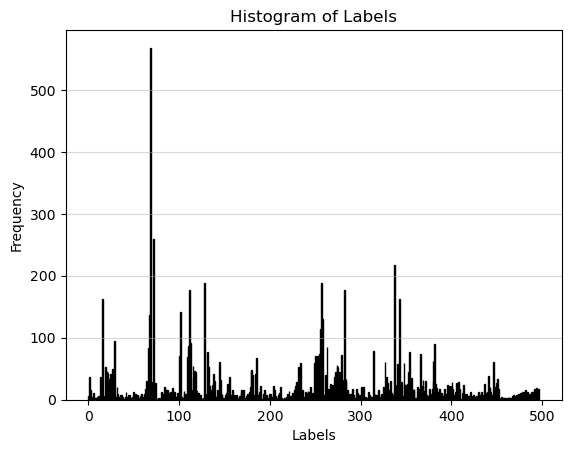

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your labels in a variable named "labels"
# Assuming you have the corresponding class names in a variable named "class_names"

# Calculate the number of bins based on the unique labels
num_bins = len(set(names_labels))

# Plot the histogram
n, bins, patches = plt.hist(labels, bins=num_bins, color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Histogram of Labels')
plt.xlabel('Labels')
plt.ylabel('Frequency')

# Add grid lines
plt.grid(axis='y', alpha=0.5)

# Calculate bin centers
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# # Adjust x-axis ticks with class names below each bin
# plt.xticks(bin_centers)
# plt.gca().set_xticklabels(names_labels, rotation=90)

# Show the plot
# plt.show()

##save the plot
# fig.savefig('histogram_depth1.png')

In [7]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)

# transform biadjacency matrix into a dense matrix
biadjacency = biadjacency.toarray()
tsne_results = tsne.fit_transform(biadjacency)

In [8]:
import matplotlib.pyplot as plt

/tmp/ipykernel_5146/2040933405.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(tsne_results[:,0], tsne_results[:,1], c=labels, cmap=plt.cm.get_cmap("jet", len(np.unique(labels))), s=5)


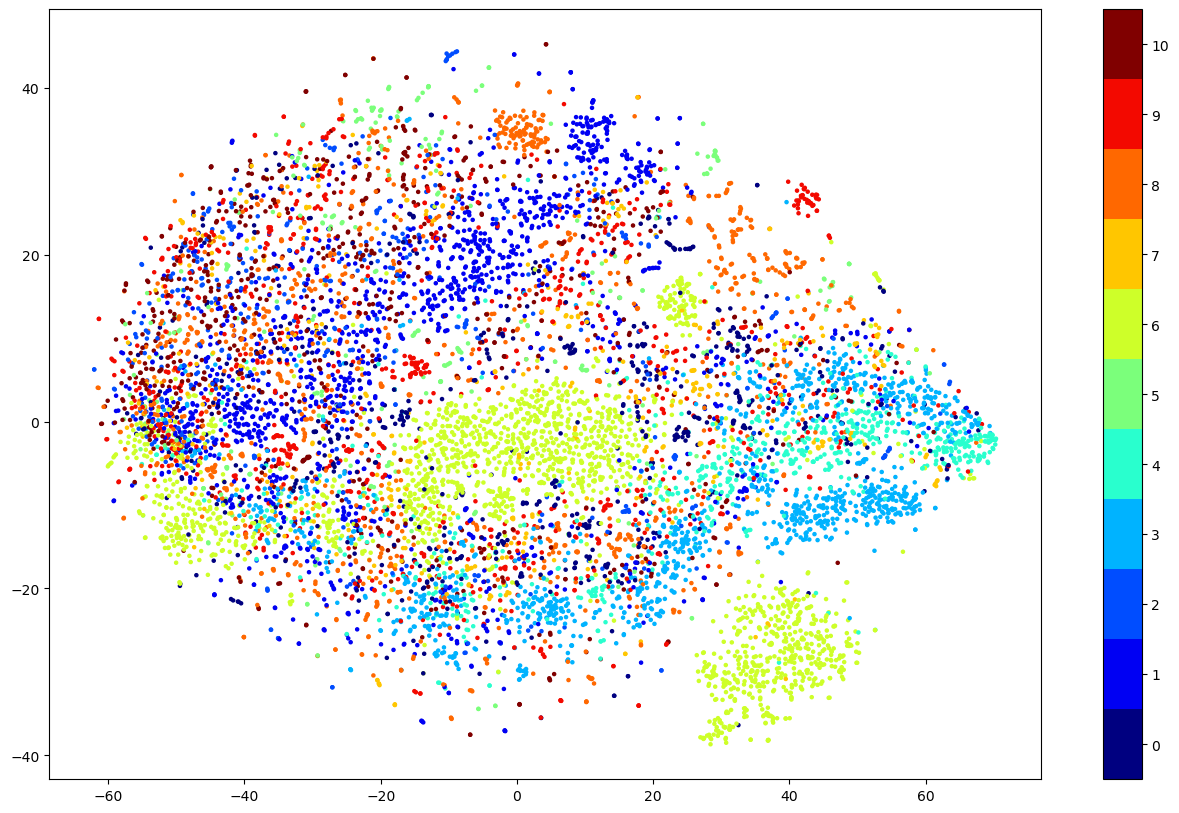

<Figure size 640x480 with 0 Axes>

In [9]:
## plot t-sne results
plt.figure(figsize=(16,10))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=labels, cmap=plt.cm.get_cmap("jet", len(np.unique(labels))), s=5)
plt.colorbar(ticks=range(len(np.unique(labels))))
plt.clim(-0.5, len(np.unique(labels))-0.5)
plt.show()
## save figure
plt.savefig('tsne_bow.png')

In [7]:
labels, names_labels = get_labels(labels_hierarchy, names_labels_hierarchy, depth=1)

## Training

In [28]:
## add a seed to keep the same results
np.random.seed(42)
## split the dataset into train validation and test
train_split = np.random.random(len(labels)) < 0.75
valid_split = (np.random.random(len(labels)) < 0.875) & ~train_split
test_split = ~train_split & ~valid_split
X_train = biadjacency[train_split]
X_valid = biadjacency[valid_split]
X_test = biadjacency[test_split]

In [8]:
print('Depth Accuracy Macro-F1')
for depth in [1, 2]:
    labels, names_labels = get_labels(labels_hierarchy, names_labels_hierarchy, depth)
    y_train = labels[train]
    y_test = labels[~train]
    model = LogisticRegression(max_iter=500)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(depth, np.mean(y_test==y_pred), f1_score(y_test, y_pred, average='macro'))

Depth Accuracy Macro-F1


KeyboardInterrupt: 

In [32]:
import importlib
import mlp
importlib.reload(mlp)

<module 'mlp' from '/home/rplaud/stage-onepoint-telecom/code/mlp.py'>

In [33]:
## train a MLP classifier from mlp.py
from mlp import MLP, MLP2, train, test, get_data
import torch
from torch import nn
from torch.optim import Adam
from torch.optim.lr_scheduler import ExponentialLR
from tqdm import trange

In [34]:
batch_size = 128
epochs = 10
lr = 0.01
hidden_size = 128
dropout = 0.5
weight_decay = 0.0005
gamma=0.9

criteria = nn.CrossEntropyLoss()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

for depth in [1, 2]:
    
    labels, names_labels = get_labels(labels_hierarchy, names_labels_hierarchy, depth)
    y_train = labels[train_split]
    y_valid = labels[valid_split]
    y_test = labels[test_split]
    train_loader, val_loader = get_data(X_train, y_train, X_valid, y_valid, batch_size=batch_size)
    model = MLP2(X_train.shape[1], hidden_size, len(np.unique(labels)))
    optimizer = Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = ExponentialLR(optimizer, gamma=gamma)

    model.to(device)

    ## train the model
    for epoch in trange(epochs):
        _ = train(model, train_loader, optimizer, criteria, device)
        test_loss, test_acc, test_f1, test_f1_micro = test(model, val_loader, criteria, device)
        print(f'Epoch {epoch} - Test Loss: {test_loss:.4f} - Test Acc: {test_acc:.4f} - Test F1: {test_f1:.4f} - Test F1 Micro: {test_f1_micro:.4f}')
        scheduler.step()

 10%|█         | 1/10 [00:07<01:03,  7.07s/it]

Epoch 0 - Test Loss: 0.5098 - Test Acc: 0.8583 - Test F1: 0.6025 - Test F1 Micro: 0.8235


 20%|██        | 2/10 [00:11<00:45,  5.64s/it]

Epoch 1 - Test Loss: 0.4195 - Test Acc: 0.8842 - Test F1: 0.9033 - Test F1 Micro: 0.9118


 30%|███       | 3/10 [00:15<00:35,  5.00s/it]

Epoch 2 - Test Loss: 0.3938 - Test Acc: 0.8915 - Test F1: 0.9190 - Test F1 Micro: 0.9412


 40%|████      | 4/10 [00:20<00:28,  4.76s/it]

Epoch 3 - Test Loss: 0.3748 - Test Acc: 0.9030 - Test F1: 0.9033 - Test F1 Micro: 0.9118


 50%|█████     | 5/10 [00:24<00:23,  4.66s/it]

Epoch 4 - Test Loss: 0.3742 - Test Acc: 0.9001 - Test F1: 0.9190 - Test F1 Micro: 0.9412


 60%|██████    | 6/10 [00:29<00:18,  4.64s/it]

Epoch 5 - Test Loss: 0.3813 - Test Acc: 0.9001 - Test F1: 0.9190 - Test F1 Micro: 0.9412


 70%|███████   | 7/10 [00:33<00:13,  4.49s/it]

Epoch 6 - Test Loss: 0.3690 - Test Acc: 0.9030 - Test F1: 0.8965 - Test F1 Micro: 0.9118


 80%|████████  | 8/10 [00:38<00:09,  4.55s/it]

Epoch 7 - Test Loss: 0.3924 - Test Acc: 0.8943 - Test F1: 0.9190 - Test F1 Micro: 0.9412


 90%|█████████ | 9/10 [00:42<00:04,  4.53s/it]

Epoch 8 - Test Loss: 0.3938 - Test Acc: 0.9011 - Test F1: 0.9414 - Test F1 Micro: 0.9412


100%|██████████| 10/10 [00:47<00:00,  4.73s/it]

Epoch 9 - Test Loss: 0.3970 - Test Acc: 0.8982 - Test F1: 0.9317 - Test F1 Micro: 0.9412


: 

: 

In [78]:
# read results/results.csv file
import pandas as pd
results = pd.read_csv('results/results.csv')
#sort using weight1 colums
results.sort_values(by=['weight1'], inplace=True, ascending=False)

,name_dataset,method,depth_training,classifier,loss,weight1,weight2,depth_evaluation,acc_mean,acc_CI,f1_mean,f1_CI
0,wikivitals,bow,2,mlp,hierarchical_bce_loss,1.0,0.0,2,0.8078,0.0121,0.6197,0.0186
1,wikivitals,bow,2,mlp,hierarchical_bce_loss,1.0,0.0,1,0.9072,0.0074,0.8874,0.0095
2,wikivitals,bow,2,mlp,hierarchical_bce_loss,0.9,0.1,2,0.8065,0.0155,0.6185,0.0236
3,wikivitals,bow,2,mlp,hierarchical_bce_loss,0.9,0.1,1,0.9074,0.0091,0.8869,0.0117
4,wikivitals,bow,2,mlp,hierarchical_bce_loss,0.8,0.2,2,0.8069,0.0144,0.6220,0.0205
5,wikivitals,bow,2,mlp,hierarchical_bce_loss,0.8,0.2,1,0.9101,0.0079,0.8910,0.0096
6,wikivitals,bow,2,mlp,hierarchical_bce_loss,0.7,0.3,2,0.8082,0.0140,0.6218,0.0260
7,wikivitals,bow,2,mlp,hierarchical_bce_loss,0.7,0.3,1,0.9082,0.0072,0.8878,0.0097
8,wikivitals,bow,2,mlp,hierarchical_bce_loss,0.6,0.4,2,0.8062,0.0111,0.6138,0.0140
9,wikivitals,bow,2,mlp,hierarchical_bce_loss,0.6,0.4,1,0.9093,0.0059,0.8890,0.0070


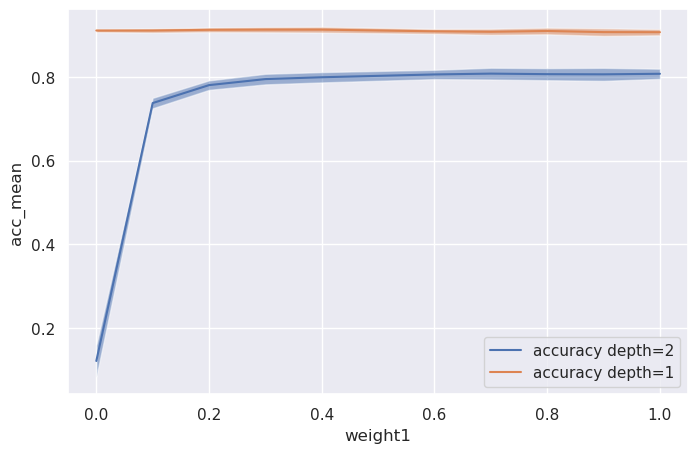

In [79]:
# plot acc_mean with confidence interval acc_CI in function of weigth1 for depth_evaluation=2
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8,5))
sns.lineplot(data=results[results['depth_evaluation']==2], x="weight1", y="acc_mean", label='accuracy depth=2')
y = results[results['depth_evaluation']==2]['acc_mean']
plt.fill_between(results[results['depth_evaluation']==2]['weight1'], y-results[results['depth_evaluation']==2]['acc_CI'], y+results[results['depth_evaluation']==2]['acc_CI'], alpha=.5)
sns.lineplot(data=results[results['depth_evaluation']==1], x="weight1", y="acc_mean", label='accuracy depth=1')
y = results[results['depth_evaluation']==1]['acc_mean']
plt.fill_between(results[results['depth_evaluation']==1]['weight1'], y-results[results['depth_evaluation']==1]['acc_CI'], y+results[results['depth_evaluation']==1]['acc_CI'], alpha=.5)
#ajouter la legende
plt.legend()

plt.show()



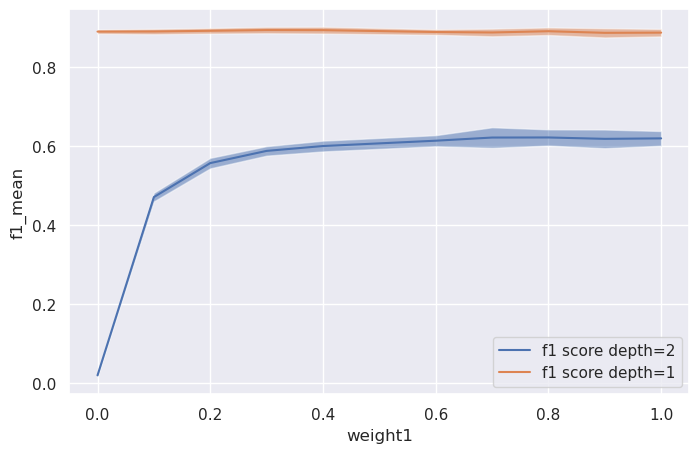

In [80]:
# plot acc_mean with confidence interval acc_CI in function of weigth1 for depth_evaluation=2
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8,5))
sns.lineplot(data=results[results['depth_evaluation']==2], x="weight1", y="f1_mean", label='f1 score depth=2')
y = results[results['depth_evaluation']==2]['f1_mean']
plt.fill_between(results[results['depth_evaluation']==2]['weight1'], y-results[results['depth_evaluation']==2]['f1_CI'], y+results[results['depth_evaluation']==2]['f1_CI'], alpha=.5)
sns.lineplot(data=results[results['depth_evaluation']==1], x="weight1", y="f1_mean", label='f1 score depth=1')
y = results[results['depth_evaluation']==1]['f1_mean']
plt.fill_between(results[results['depth_evaluation']==1]['weight1'], y-results[results['depth_evaluation']==1]['f1_CI'], y+results[results['depth_evaluation']==1]['f1_CI'], alpha=.5)
plt.show()



In [81]:
import transformers

In [83]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [122]:
depth1 = list(set([name.split('|||')[0] for name in names_labels]))
dico = dict(zip(depth1, range(len(depth1))))

In [125]:
names = [name.split('|||')[1]  for name in names_labels]
labels = [dico[name.split('|||')[0]]  for name in names_labels]

In [129]:
outputs = []
for name in names:
    encoded_input = tokenizer.encode(name, add_special_tokens=True)
    input_ids = torch.tensor(encoded_input).unsqueeze(0)  # Converting to a tensor and adding batch dimension
    output = model(input_ids).pooler_output.squeeze()
    outputs.append(output.detach().numpy())
outputs = np.array(outputs)

In [127]:
## T-sne embeddin

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 0.0910,  0.4049, -0.1080,  ..., -0.1664,  0.3206,  0.5133],
         [ 0.1563,  0.9173, -0.5102,  ..., -0.1917,  0.2424, -0.1037],
         [ 0.9488,  0.0428, -0.3212,  ...,  0.1149, -0.7734, -0.2719]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-0.9487, -0.4723, -0.7365,  0.8463,  0.5251, -0.1966,  0.9449,  0.3784,
         -0.4490, -1.0000, -0.4899,  0.8997,  0.9838,  0.3429,  0.9396, -0.8326,
         -0.4486, -0.6830,  0.3835, -0.7357,  0.6639,  0.9997, -0.0467,  0.4634,
          0.4504,  0.9596, -0.8050,  0.9466,  0.9508,  0.8576, -0.7447,  0.3496,
         -0.9942, -0.2665, -0.6635, -0.9919,  0.4816, -0.8449, -0.0638, -0.1809,
         -0.9199,  0.4787,  1.0000, -0.2320,  0.4215, -0.4394, -1.0000,  0.3367,
         -0.9283,  0.7399,  0.6715,  0.5676,  0.1464,  0.6010,  0.4784, -0.3153,
          0.0389,  0.2733, -0.3104, -0.6541, -0.5290,  0.4360, -0.6942, -0.9303,
          0.7028